## Task 6.4 Linear Regression


This script contains the following:

1.  Importing libraries
2.  Importing cleaned data
3.  Data cleaning
4.  Explore your data visually (e.g., by way of a scatterplot)
5.  State research hypothesis
6.  Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.
7.  Split the data into two sets: a training set and a test set.
8.  Run a linear regression on the data
9.  Create a plot that shows the regression line on the test set
10. Interpretation of regression line
11. Check the model performance statistics — MSE and R2 score
12. Compare the predicted y values with the actual y values in a dataframe
13. Interpretation on how model performed on test set

## Importing libraries and Importing cleaned data

In [25]:
#Importing libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
#display visualizations

%matplotlib inline

In [27]:
path = r'C:\Users\nikman\Desktop\CareerFoundry Project\Achievement 6\Tasks Achievement 6'

In [28]:
#importing dataframe

df = pd.read_excel(os.path.join(path,'Cleaned Data Set.xlsx'),index_col = False)

In [29]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3,15,Within past year (anytime less than 12 months ...,Yes,5,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [30]:
df.shape

(246022, 40)

## 3. Data Cleaning
Checking for missing values

Checking for duplicate values

In [31]:
# Checking for missing values
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

## There are no missing values

In [32]:
# duplicate values

dups = df.duplicated()

In [33]:
dups.shape

(246022,)

## There are no duplicate records

C:\Users\nikman\AppData\Local\Temp\ipykernel_22516\3310469293.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'], bins = 25)
C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BMI', ylabel='Density'>

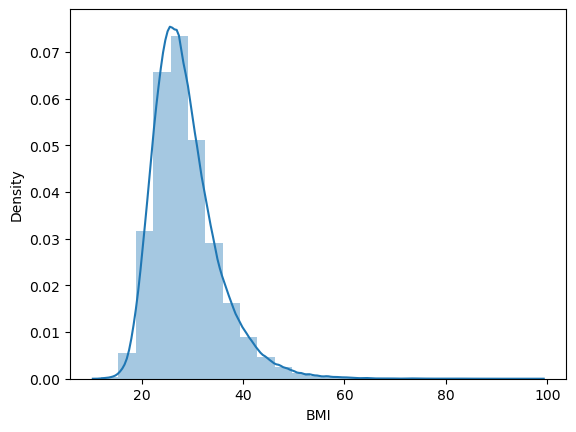

In [34]:
# Check for extreme values

sns.distplot(df['BMI'], bins = 25)

In [35]:
# Check for how many extreme values

df[df['BMI'] > 70]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
246,Alabama,Female,Poor,30,30,Within past year (anytime less than 12 months ...,No,9,1 to 5,Yes,...,1.22,136.08,91.55,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
3779,Alaska,Male,Fair,2,10,Within past year (anytime less than 12 months ...,No,7,None of them,No,...,1.78,249.48,78.92,Yes,Yes,Yes,No,"Yes, received Tdap",No,No
6092,Arizona,Female,Very good,0,2,Within past year (anytime less than 12 months ...,Yes,7,1 to 5,No,...,1.65,250.00,91.72,Yes,Yes,No,Yes,"Yes, received tetanus shot but not sure what type",No,No
7322,Arizona,Male,Good,0,0,Within past year (anytime less than 12 months ...,Yes,8,None of them,No,...,1.88,265.00,75.01,No,Yes,Yes,Yes,"Yes, received Tdap",No,No
9060,Arizona,Male,Fair,15,15,Within past year (anytime less than 12 months ...,No,8,None of them,No,...,1.85,292.57,85.10,No,No,No,No,"Yes, received Tdap",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229249,West Virginia,Female,Good,3,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",No,...,1.47,158.76,73.15,No,No,No,No,"Yes, received tetanus shot but not sure what type",No,Yes
230207,West Virginia,Female,Fair,0,27,Within past year (anytime less than 12 months ...,No,6,"6 or more, but not all",Yes,...,1.60,181.44,70.86,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
230930,West Virginia,Female,Poor,30,15,Within past year (anytime less than 12 months ...,No,7,1 to 5,No,...,1.63,217.27,82.22,No,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,Yes
235683,Wisconsin,Female,Fair,3,5,Within past year (anytime less than 12 months ...,No,10,1 to 5,No,...,1.70,246.30,85.04,No,Yes,Yes,Yes,"Yes, received Tdap",No,No


In [36]:
df['BMI'].describe()

count    246022.000000
mean         28.668136
std           6.513973
min          12.020000
25%          24.270000
50%          27.460000
75%          31.890000
max          97.650000
Name: BMI, dtype: float64

##
Mean: 28.66

Median: 27.46

Max: 97.65 



## 4.Explore your data visually (e.g., by way of a scatterplot)

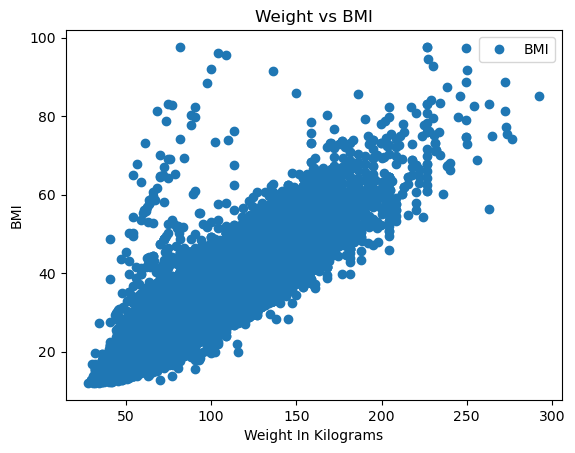

In [37]:
# Create a scatterplot using matplotlib for looking at how BMI and Weight plot against each other.

df.plot(x = 'WeightInKilograms', y='BMI',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Weight vs BMI')  
plt.xlabel('Weight In Kilograms')  
plt.ylabel('BMI')  
plt.show()

### In our scatterplot analysis, we observe a positive correlation between the independent variable X (Weight) and the dependent variable y (BMI).To evaluate our hypothesis effectively, we will be conducting a linear regression analysis with Weight and BMI. 

### We also notice where Weight is relatively lower but BMI remains high. This observation suggests the other factors beyond just weight impacting BMI. 

## 5.State your hypothesis in a markdown cell within your Jupyter notebook.

How does BMI correlate with the likelihood of heart disease, and what factors mediate or moderate this relationship?

## 6. Reshape variables with X as independent avriable and y as dependant variable

In [14]:
#Reshaping variables
X = df['WeightInKilograms'].values.reshape(-1,1)
y = df['BMI'].values.reshape(-1,1)

In [15]:
X

array([[ 71.67],
       [ 95.25],
       [108.86],
       ...,
       [ 83.91],
       [ 83.01],
       [108.86]])

In [16]:
y

array([[27.99],
       [30.13],
       [31.66],
       ...,
       [29.86],
       [28.66],
       [32.55]])

## 7.Split the data into two sets: a training set and a test set.

In [17]:
#Splitting the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 8.Run a linear regression on the data

### Fit the model you created to the training set

In [18]:
# Create a linear regression object

regression = LinearRegression()

In [19]:
#Fitting the regression object on the training set

regression.fit(X_train, y_train)

LinearRegression()

##  Create a prediction for y on the test set

In [20]:
# Predict values of y using X_test set

y_predicted = regression.predict(X_test)

## 9.Create a plot that shows the regression line on the test set

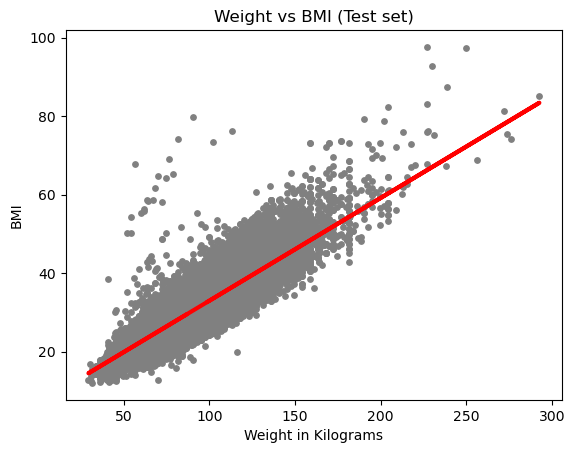

In [40]:



# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Weight vs BMI (Test set)')
plot_test.xlabel('Weight in Kilograms')
plot_test.ylabel('BMI')
plt.savefig('linear_regression5.png')
plot_test.show()

## 10: Interpretation of regression line and data

The linear model represented by the red regression line has a lot of data points closely clustered around this line with just some data points that are spread out which indicates for most cases as the Weight increases the BMI also increases.
Although the data points were Weight is low and BMI is still high may contradict this positive correlation between BMI and Weight. These outliers suggest the presence of other influential factors beyond Weight alone in determining BMI or this could indicate a biased dataset. Despite these outliers, the overall trend suggests that, in general, as Weight increases, BMI also tends to increase.

## 11.Check the model performance statistics—MSE and R2 score

In [22]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [23]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.26204635]]
Mean squared error:  11.156798602773538
R2 score:  0.7391948835550226


## Slope:
The positive slope value of approximately 0.262 indicates a direct positive relationship between Weight (X) and BMI (y), implying that as Weight increases, BMI tends to increase as well. This suggests a significant impact of Weight on BMI within the observed dataset.

## RMSE
The relatively low mean squared error (MSE) of approximately 11.16 suggests that the regression line closely aligns with the data points, indicating a strong fit of the model. Given the substantial size of the dataset, comprising 246,022 observations, this low RMSE value suggests the strong effect of  Weight and BMI. Thus, the model may reliably predict the influence of Weight on BMI within this dataset.

## R2 Score:
With an R2 score of approximately 0.739, the model explains approximately 73.9% of the variance in the dependent variable (BMI) based on the independent variable (Weight). This R2 score indicates a relatively strong fit of the regression model to the data, suggesting that Weight accounts for a considerable portion of the variability observed in BMI within the dataset.

## 12. Compare the predicted y values with the actual y values in a dataframe

In [24]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,25.77,29.338624
1,27.44,24.585103
2,27.26,30.646236
3,34.01,28.151554
4,22.96,25.772173
5,27.81,26.010636
6,26.54,28.743779
7,21.02,25.179949
8,53.38,43.722348
9,39.31,36.589447


## Interpretation of BMI (y variable) actual and predicted values



Predictions: 
For some instances the predicted BMI values are close to the actual BMI values. This suggests that the model is accurately capturing the relationship between the independent variable (Weight) and the dependent variable (BMI) for these data points.

However, there are instances where the predicted BMI values deviate significantly from the actual BMI values (e.g., index 1, 3, 8, 9, 12, 15, 20, and 25). This could indicate possible errors or bias such as:measurement bias or collection bias in the model

Overall, while the model appears to perform well for many data points, the discrepancies between actual and predicted BMI values may indicate the need for consideration of additional factors that may influence BMI beyond Weight alone.

## 13. Interpretation on model performance and impact of possible data bias


### Model Performance on Test Set

The model generally performed well on the test set, accurately predicting BMI values for a most of the of the data points.  This indicated that the model effectively captured the relationship between Weight and BMI of the test data.

However, there were instances where the model's predictions were different from the actual BMI values. These discrepancies suggest potential limitations or errors in the model, particularly in cases where the predicted BMI values diverged notably from the observed values. 

### Reflections on Data Bias

Data bias may have influenced the model's performance, specifically if the data set disproportionately represents certain demographic groups related to ethinicity, age or socioeconomic background 

Bias may also arise if the data set excludes other variables that could impact BMI such as Diet or Genetics.

Additionally, measurement bias in recording BMI can affect the dataset especially if standardization procedures, quality control measures, and the use of reliable measurement tools are not established.

Therefore, addressing potential data bias and ensuring the inclusion of diverse and representative data can help improve the model's acuracy and applicability across various population groups.